In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../python_scripts/')
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.backend as K
from scipy.stats import pearsonr, spearmanr
import sys, os
sys.path.append('../python_scripts/')
import analysis, datasets
sys.path.append('../imported_code/svcca/')
import cca_core, pwcca
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

from sklearn.manifold import MDS
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Dropout, GlobalAveragePooling2D,
                                    MaxPooling2D, Activation, Dense, Layer)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import LearningRateScheduler, Callback
from tensorflow.keras import backend as K 
sys.path.append('../../../python_scripts/')


In [7]:
path_to_instances = '../outputs/models/primary/'
instances = os.listdir(path_to_instances)
# for instance in instances:
    # Skip any non-model files that may have snuck in
instance = 'instance_200.h5'
# if '.h5' not in instance:
#     continue
K.clear_session()
model = load_model(path_to_instances+instance)
results = model.evaluate(testData.prefetch(tf.data.experimental.AUTOTUNE)\
                            .batch(128))

79/79 [==============================] - 1s 15ms/step - loss: 1.1990 - accuracy: 0.8477


In [2]:
model = load_model('../outputs/models/primary/instance_1210.h5') 

In [18]:
_, testData = datasets.make_train_data()
x_predict, _ = datasets.make_predict_data(testData)
acts = analysis.get_acts(model, range(9), x_predict, False)


Making train data...
GCN...
ZCA...


KeyboardInterrupt: 

Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
(1000, 2)


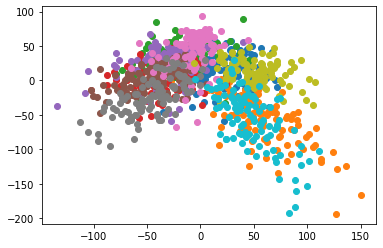

In [19]:
model = load_model('../outputs/models/primary/instance_200.h5')
acts = analysis.get_acts(model, range(9), x_predict, False)
embedding = MDS(n_components=2, dissimilarity='euclidean')
num_imgs, h, w, channels = acts[8].shape
# rdm = analysis.get_rdm(acts[8].reshape(num_imgs, h*w*channels))
X_transformed = embedding.fit_transform(np.mean(acts[8], axis=(1,2)))
print(X_transformed.shape)
for i in range(10):
    plt.scatter(X_transformed[i*100 : (i+1)*100, 0], X_transformed[i*100 : (i+1)*100, 1])
plt.show()

Layer 0
Getting activations...
Layer 1
Getting activations...
Layer 2
Getting activations...
Layer 3
Getting activations...
Layer 4
Getting activations...
Layer 5
Getting activations...
Layer 6
Getting activations...
Layer 7
Getting activations...
Layer 8
Getting activations...
(1000, 2)


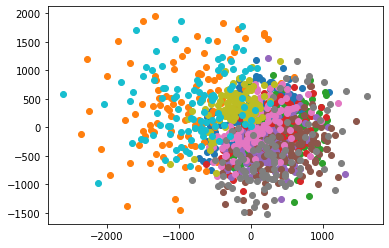

In [16]:
model = load_model('../outputs/models/primary/instance_1210.h5') 
acts = analysis.get_acts(model, range(9), x_predict, False)
embedding = MDS(n_components=2, dissimilarity='euclidean')
num_imgs, h, w, channels = acts[8].shape
# rdm = analysis.get_rdm(acts[8].reshape(num_imgs, h*w*channels))
X_transformed = embedding.fit_transform(acts[8].reshape(num_imgs, h*w*channels))
print(X_transformed.shape)
for i in range(10):
    plt.scatter(X_transformed[i*100 : (i+1)*100, 0], X_transformed[i*100 : (i+1)*100, 1])
plt.show()

In [31]:
def get_training_metrics(path_to_instances):
    losses = []
    accs = []
    instances = os.listdir(path_to_instances)
    for instance in instances:
        # Skip any non-model files that may have snuck in
        if '.h5' not in instance:
            continue
        print(instance)
        K.clear_session()
        model = load_model(path_to_instances+instance)
        results = model.evaluate(testData.prefetch(tf.data.experimental.AUTOTUNE)\
                                 .batch(128))
        accs.append(results[1])
        
    return np.array(accs)

In [35]:
def get_column(accs, total):
    sr = 10/total
    _min = np.amin(accs)
    _max = np.amax(accs)
    mean = np.mean(accs)
    med = np.median(accs)
    return [_max, _min, mean, med, sr]

w_accs = get_training_metrics('../outputs/models/primary/')
s_accs = get_training_metrics('../outputs/models/shuffle_seed/')
b_accs = get_training_metrics('../outputs/models/both/')

data = np.array([get_column(w_accs, 15),
                get_column(s_accs, 26),
                get_column(b_accs, 14)])
index = ['weights', 'shuffle', 'both']
columns = ['max acc', 'min acc', 'mean acc', 'med acc', 'success rate']

instance_303.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.2462 - accuracy: 0.8443
instance_207.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.2275 - accuracy: 0.8472
instance_302.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.1789 - accuracy: 0.8520
instance_206.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.2720 - accuracy: 0.8395
instance_305.h5
79/79 [==============================] - 1s 13ms/step - loss: 1.2275 - accuracy: 0.8460
instance_203.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.2411 - accuracy: 0.8425
instance_304.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.3536 - accuracy: 0.8371
instance_202.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.2386 - accuracy: 0.8414
instance_200.h5
79/79 [==============================] - 1s 14ms/step - loss: 1.1990 - accuracy: 0.8477
instance_306.h5
79/79 [==============================] - 1s 14ms

In [38]:
import pandas as pd
df = pd.DataFrame(data=data, index=index, columns=columns)
df

,max acc,min acc,mean acc,med acc,success rate
weights,0.8520,0.8371,0.84430,0.84480,0.666667
shuffle,0.8445,0.8328,0.83886,0.83865,0.384615
both,0.8477,0.8342,0.84252,0.84285,0.714286


In [3]:
# Function to make models
def init_model(architecture: str, seed: int):
    
    if (architecture == 'all_cnn_c'):
        model = Sequential()
        # model.add(Dropout(0.2, input_shape=x_train.shape[1:])) #input shape from keras cifar10 example
        model.add(Conv2D(96, (3, 3), input_shape=(32, 32, 3), padding='same', bias_regularizer=l2(1e-5),
                         kernel_regularizer=l2(1e-5), kernel_initializer=he_normal(seed), 
                         bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(96, (3, 3), padding='same', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5),
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(96, (3, 3), strides=2, padding='same', bias_regularizer=l2(1e-5),
                         kernel_regularizer=l2(1e-5), bias_initializer='zeros', activation='relu'))
        # model.add(Dropout(0.5))
        model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5),
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5),
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(192, (3, 3), strides=2, padding='same',kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5),
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        # model.add(Dropout(0.5))
        model.add(Conv2D(192, (3, 3), padding='valid', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5),
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(192, (1, 1), padding='valid', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), 
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(Conv2D(10, (1, 1), padding='valid', kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), 
                         kernel_initializer=he_normal(seed), bias_initializer='zeros', activation='relu'))
        model.add(GlobalAveragePooling2D())
        model.add(Activation('softmax'))
        
        model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, clipnorm=500),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    else:
        raise

    return model

In [4]:
print('Making test data...')
counts = [0] * 10
x_predict = np.empty((1000, 32, 32, 3))
y_predict = np.empty((1000, 10))
for batch in testData:
    batch_index = 0
    for label in batch[1]:
        print(label)
#     for item in batch[0]:
#         print(item.shape)
#         index = np.argmax(item)
#         cur_count = counts[index]
#         if cur_count != 100:
#             print(item[0].shape)
#             x_predict[100 * index + cur_count] = item[0].numpy()
#             print(item[1].shape)
#             y_predict[100 * index + cur_count] = item[1].numpy()
#             counts[index] += 1
#         # Finish once all 10 categories are full
#         if all(count == 100 for count in counts):
#             break
#     if all(count == 100 for count in counts):
#             break


Making test data...
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Te

tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0

tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0

tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0

tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0

tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0

tf.Tensor([[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)

KeyboardInterrupt: 

In [5]:
model = init_model('all_cnn_c', 0)
history = model.fit(
            trainData,
            epochs=350,
            validation_data=testData,
            validation_steps=10,
            shuffle=True)

Train for 391 steps, validate for 10 steps
Epoch 1/350
391/391 [==============================] - 15s 38ms/step - loss: 2.3164 - accuracy: 0.1006 - val_loss: 2.3267 - val_accuracy: 0.0991
Epoch 2/350
 89/391 [=====>........................] - ETA: 12s - loss: 2.3267 - accuracy: 0.0998

KeyboardInterrupt: 

In [3]:
predictData = correlations.make_test_data(testData)

Making test data...
Done!


In [5]:
for data in predictData:
    print(data[1])

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Ten

tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float64)
tf.Ten

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float64)
tf.Ten

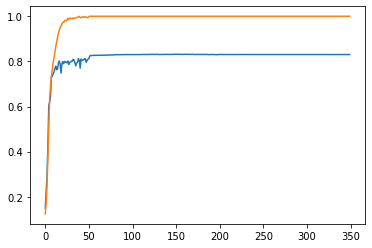

In [15]:
plt.plot(train_0['val_accuracy'])
plt.plot(train_0['accuracy'])loss

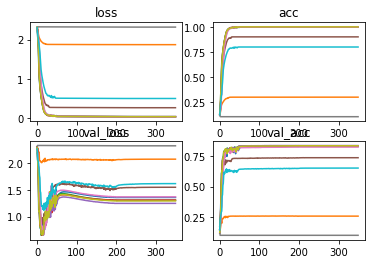

In [17]:
f, axarr = plt.subplots(2,2)
axarr[0,0].set_title('loss')
axarr[0,1].set_title('acc')
axarr[1,0].set_title('val_loss')
axarr[1,1].set_title('val_acc')

for i in range(10):
    train = pickle.load(open('../tests/gpu_variance/with_hash/trainHistoryDict_'+str(i), 'rb'))
    axarr[0,0].plot(train['loss'])
    axarr[0,1].plot(train['accuracy'])
    axarr[1,0].plot(train['val_loss'])
    axarr[1,1].plot(train['val_accuracy'])
    
plt.show()

In [2]:
x_test = np.load('../data/cifar10_modified/x_test_new.npy')
y_test = np.load('../data/cifar10_modified/y_test_new.npy')

In [13]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
model = load_model('../outputs/models/primary/Version_5/instance_9.h5')
print('\n# Evaluate on test data')
results = model.evaluate(testData.prefetch(tf.data.experimental.AUTOTUNE)\
                            .batch(128))
print('test loss, test acc:', results)


# Evaluate on test data
79/79 [==============================] - 1s 16ms/step - loss: 1.2936 - accuracy: 0.8425
test loss, test acc: [1.2935999118829076, 0.8425]


In [14]:
_, (_, y_test_b) = cifar10.load_data()

In [15]:
y_test_b = to_categorical(y_test_b)

In [18]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_test_b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
'''
RSA: Create an RDM for each activation layer (90 total) and get correlations between pairings of RDMs
'''
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten
from scipy.stats import pearsonr, spearmanr

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

x_predict, y_predict = correlations.make_test_data(whiten=False)
# Function to correlate 2 RDMs
def correlate(RDM_1, RDM_2):
    print('Making correlations...')
    assert len(RDM_1) == len(RDM_2)
    num_unique_entries = 499500 # for 1000x1000
    arr_1 = np.empty((num_unique_entries))
    arr_2 = np.empty((num_unique_entries))
    counter = 0
    # first flatten all the relevant values
    for i in range(len(RDM_1)): #1000
        for j in range(i + 1, len(RDM_1)):
            arr_1[counter] = RDM_1[i, j]
            arr_2[counter] = RDM_2[i, j]
            counter += 1
    # Get Pearson correlation
    return pearsonr(arr_1, arr_2)[0]


num_images = len(x_predict) # 1000
RDM_list = np.empty((90, 1000, 1000)) #layer * instance, images, images
# Loop through network instances
for i in range(10):
    print('Working on model', str(i))
    K.clear_session()
    full_model = load_model('../outputs/models/primary/Version_4/all_cnn_c_instance_' + str(i) + '.h5')
    inp = full_model.input
    # Loop through layers
    for j in range(0, 9):
        print('Layer', str(j))
        out = full_model.layers[j].output
        # Flatten representation if needed
        if len(out.shape) != 2:
            out = Flatten()(out)
        temp_model = Model(inputs=inp, outputs=out)
        # Predict on x_predict, transpose for spearman
        print('Getting representation...')
        representations = temp_model.predict(x_predict).T
        print(representations.shape)
        print('Getting RDM...')
        RDM_list[10 * j + i] = spearmanr(representations, representations)[0][:num_images, :num_images]
        
print('Done gathering RDMs, now correlations')
correlations = np.empty((90, 90))
for i in range(correlations.shape[0]):
    for j in range(correlations.shape[1]):
        print('Correlation', str(i), ',', str(j))
        correlations[i, j] = correlate(RDM_list[i], RDM_list[j])

np.save('all_cnn_c_version_4_correlations.npy', correlations)
print('Done!')    
    